In [1]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon, Point
import pandas as pd
from matplotlib import pyplot as plt
from shapely import wkt
from geopandas import GeoDataFrame
%matplotlib inline

plt.rcParams['axes.titlesize'] = 17
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.labelsize'] = 12

In [2]:
CABA = gpd.read_file('datos/mapas/barrios.shp')
CABA.head()

,BARRIO,COMUNA,PERIMETRO,AREA,geometry
0,CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((-58.4528200492791 -34.5959886570639,..."
1,PATERNAL,15.0,7087.513295,2.229829e+06,"POLYGON ((-58.4655768128541 -34.5965577078058,..."
2,VILLA CRESPO,15.0,8132.699348,3.613584e+06,"POLYGON ((-58.4237529813037 -34.5978273383243,..."
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,"POLYGON ((-58.4946097568899 -34.6148652395239,..."
4,ALMAGRO,5.0,8537.901368,4.050752e+06,"POLYGON ((-58.4128700313089 -34.6141162515854,..."


In [3]:
# La mantengo por las dudas pero no  creo que sea necesaria

def obtener_poligono(multi):
    l =[]
    for x in multi.split(')'):
        poligono = []
        for y in x.split(','):
            if 'MULTIPOLYGON ' in y:
                y = y.replace('MULTIPOLYGON ', '')
            if 'POLYGON ' in y:
                y = y.replace('POLYGON ', '')
            if '(' in y:
                y = y.replace('(', '')
            if len(y) < 5:
                continue
            lon, lat = y.split()
            poligono.append((float(lon), float(lat)))
        l.append(Polygon(poligono))
    return MultiPolygon(l)

In [7]:
#CABA.loc[:,'geometry'] = CABA.loc[:,'geometry'].apply(lambda x: obtener_poligono(x))

In [5]:
#CABA.head()

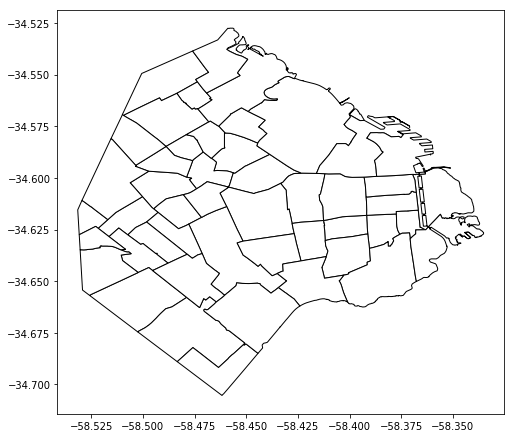

In [5]:
CABA.plot(color='white', edgecolor='black',figsize=(8,8))
plt.savefig('informe/imagenes/caba.png', bbox_inches = 'tight', pad_inches = 0.5)

plt.show()

In [6]:
#propiedades = pd.read_csv('properati.csv')
propiedades = pd.read_csv('/home/agustin/Escritorio/escritorio/fiuba/Organizacion de datos/properati.csv')

In [7]:
solo_capital = propiedades.loc[(propiedades.state_name == 'Capital Federal') & (propiedades.lat.notnull()) & (propiedades.lon.notnull()),:]
solo_capital = solo_capital.loc[((solo_capital.lat <= -34.515) & (solo_capital.lat >= -34.750)),:]
solo_capital = solo_capital.loc[((solo_capital.lon <= -58.300) & (solo_capital.lon >= -58.550)),:]

In [8]:
solo_capital.loc[:,'geometry'] = solo_capital.loc[:,['lat','lon']].apply(lambda y: Point(y[1],y[0]), axis = 1)
solo_capital.head(1)

,created_on,currency,expenses,fecha_de_publicacion,floor,lat,lon,place_name,place_with_parent_names,price,...,property_type,rooms,state_name,superficie,Year,Month,Year_created,Month_created,cantidad_meses_publicado,geometry
0,2012-08-08,NaN,NaN,2013-07-01,10.0,-34.561208,-58.464514,Belgrano,|Argentina|Capital Federal|Belgrano|,NaN,...,apartment,3.0,Capital Federal,102.0,2013,7,2012,8,11,POINT (-58.464514 -34.561208)


In [9]:
solo_capital['price_aprox_usd'].describe()

count    7.599450e+05
mean     2.219684e+05
std      3.509063e+05
min      0.000000e+00
25%      9.200000e+04
50%      1.350000e+05
75%      2.260000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [10]:
solo_capital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838542 entries, 0 to 2455308
Data columns (total 24 columns):
created_on                    838542 non-null object
currency                      755674 non-null object
expenses                      82200 non-null float64
fecha_de_publicacion          838542 non-null object
floor                         222514 non-null float64
lat                           838542 non-null float64
lon                           838542 non-null float64
place_name                    838542 non-null object
place_with_parent_names       838542 non-null object
price                         759947 non-null float64
price_aprox_local_currency    759945 non-null float64
price_aprox_usd               759945 non-null float64
price_per_m2                  259581 non-null float64
price_usd_per_m2              617917 non-null float64
property_type                 838542 non-null object
rooms                         644557 non-null float64
state_name                    8

In [11]:
#Tomo el valor del 25% y 75%
minimo = 9.2 * (10 ** 4)
maximo = 2.26 * (10 ** 5)
print(minimo,maximo)

(92000.0, 225999.99999999997)


In [12]:
cant_colores = 3

precios = []
for i in range(cant_colores + 1):
    precios.append(minimo + (maximo - minimo) * i / cant_colores)
precios

[92000.0, 136666.66666666666, 181333.3333333333, 225999.99999999997]

In [13]:
#Me fijo que esten en Capital, porque algunos datos estan mal
solo_capital.loc[:,'contiene'] = solo_capital.loc[:,'geometry'].apply(lambda x: CABA.contains(x).any())
solo_capital.head(1)

,created_on,currency,expenses,fecha_de_publicacion,floor,lat,lon,place_name,place_with_parent_names,price,...,rooms,state_name,superficie,Year,Month,Year_created,Month_created,cantidad_meses_publicado,geometry,contiene
0,2012-08-08,NaN,NaN,2013-07-01,10.0,-34.561208,-58.464514,Belgrano,|Argentina|Capital Federal|Belgrano|,NaN,...,3.0,Capital Federal,102.0,2013,7,2012,8,11,POINT (-58.464514 -34.561208),True


In [14]:
#solo_capital.to_csv("/home/agustin/Escritorio/estan_en_capital.csv", index = False)
solo_capital = pd.read_csv('estan_en_capital.csv')

In [15]:
solo_capital = solo_capital.loc[solo_capital.contiene,:]

In [16]:
prop = []
for i in range(cant_colores):
    prop.append(solo_capital.loc[(solo_capital.price_aprox_usd >= precios[i]) & \
                                (solo_capital.price_aprox_usd < precios[i + 1]),['geometry','price_aprox_usd']])

In [17]:
colores = ['green', 'yellow', 'red']  #de mas barato a mas caro

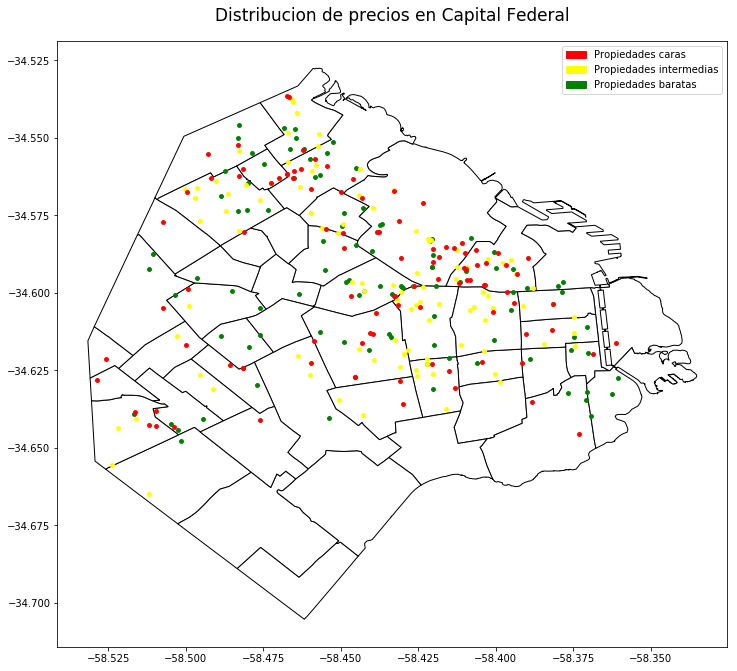

In [21]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')

CABA.plot(ax=ax, color='white', edgecolor='black')

for indice,dataframe in enumerate(prop):
    dataframe = dataframe.sample(n = 100)
    dataframe = GeoDataFrame(dataframe)
    dataframe.plot(ax = ax, color = colores[indice], markersize = 15)

# Descripcion de colores
red_patch = mpatches.Patch(color='red', label='Propiedades caras')
yellow_patch = mpatches.Patch(color='yellow', label='Propiedades intermedias')
green_patch = mpatches.Patch(color='green', label='Propiedades baratas')
plt.legend(handles=[red_patch,yellow_patch,green_patch])
    
plt.title("Distribucion de precios en Capital Federal")
plt.savefig('informe/imagenes/distribucion_de_precios.png', bbox_inches = 'tight', pad_inches = 0.5)

plt.show();

In [57]:
CABA.contains(Point(-58.516100,-34.589408)).any()

True

In [58]:
CABA.contains(Point(58.516100,-34.589408)).any()

False

## Muestro unicamente las n propiedades mas caras

In [22]:
cantidad = 50

In [23]:
solo_capital = solo_capital.loc[(solo_capital.price_aprox_usd <= maximo) & (solo_capital.price_aprox_usd >= minimo),:]

In [24]:
mas_caras = solo_capital.loc[:,['price_aprox_usd','geometry']].sort_values(by = 'price_aprox_usd', ascending = False).head(cantidad)
mas_caras.head(1)

,price_aprox_usd,geometry
161113,225995.66,POINT (-58.459324 -34.626409)


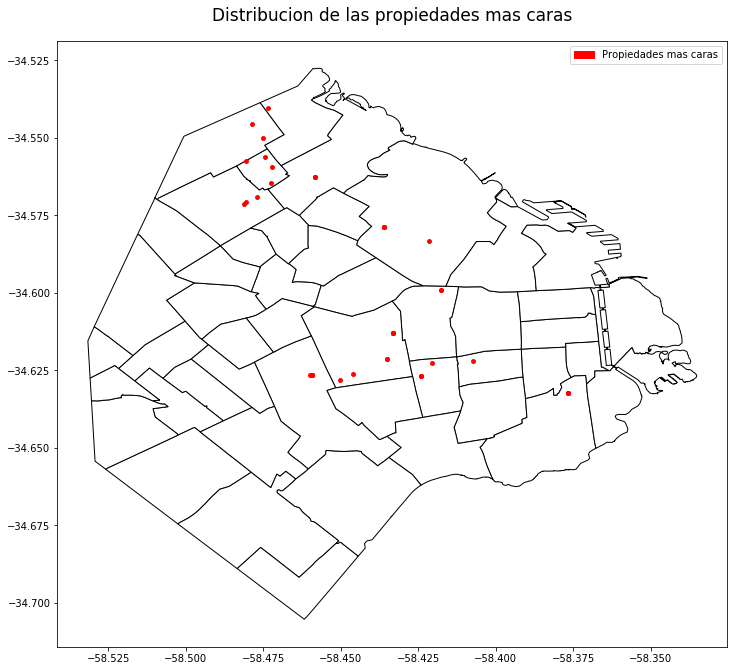

In [32]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')

CABA.plot(ax=ax, color='white', edgecolor='black')

dataframe = GeoDataFrame(mas_caras)
dataframe.plot(ax = ax, color = 'red', markersize = 15)

plt.title("Distribucion de las propiedades mas caras")

red_patch = mpatches.Patch(color='red', label='Propiedades mas caras')
plt.legend(handles=[red_patch])

plt.savefig('informe/imagenes/propiedades_caras.png', bbox_inches = 'tight', pad_inches = 0.5)

plt.show();

## Muestro unicamente las n propiedades mas baratas

In [37]:
mas_baratas = solo_capital.loc[:,['price_aprox_usd','geometry']].sort_values(by = 'price_aprox_usd').head(cantidad)
mas_baratas.head(1)

,price_aprox_usd,geometry
116740,92000.0,POINT (-58.511839 -34.64666500000001)


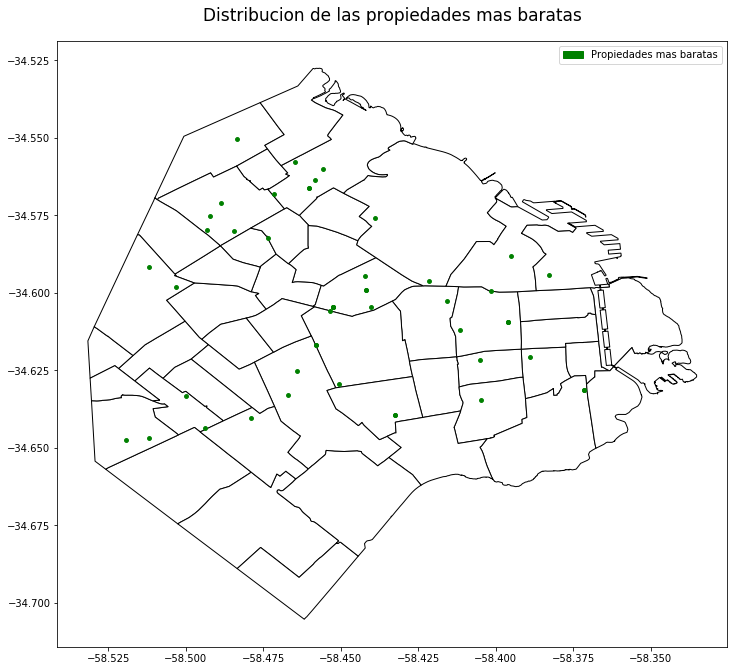

In [39]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')

CABA.plot(ax=ax, color='white', edgecolor='black')

dataframe = GeoDataFrame(mas_baratas)
dataframe.plot(ax = ax, color = 'green', markersize = 15)

plt.title("Distribucion de las propiedades mas baratas")

green_label = mpatches.Patch(color='green', label='Propiedades mas baratas')
plt.legend(handles=[green_label])

plt.savefig('informe/imagenes/propiedades_baratas.png', bbox_inches = 'tight', pad_inches = 0.5)

plt.show();

# Mapas segun precios promedios

In [40]:
def eliminar_acentos(string):
    con_tilde = ['á','é', 'í', 'ó', 'ú']
    sin_tilde = ['a', 'e', 'i', 'o', 'u']
    res = ''
    for c in string:
        if c.lower() in con_tilde:
            i = con_tilde.index(c.lower())
            c = sin_tilde[i].upper()
        res += c
    return res

In [41]:
solo_capital.loc[:,'place_name'] = solo_capital.loc[:,'place_name'].str.upper()
solo_capital.loc[:,'place_name'] = solo_capital.loc[:,'place_name'].apply(eliminar_acentos)

In [42]:
solo_capital = solo_capital.loc[:,['place_name','price_aprox_usd','price_usd_per_m2']].\
groupby('place_name').agg('mean')
solo_capital.head()

,price_aprox_usd,price_usd_per_m2
place_name,,
ABASTO,140297.621939,2081.433794
AGRONOMíA,139060.132740,2112.557482
ALMAGRO,138404.746757,2162.454799
BALVANERA,136085.447239,1934.947932
BARRACAS,139996.542307,2179.446134


In [43]:
caba = pd.merge(CABA,solo_capital,how='left',left_on='BARRIO', right_index=True)
caba.head()

/usr/local/lib/python2.7/dist-packages/pandas/core/reshape/merge.py:1406: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


,BARRIO,COMUNA,PERIMETRO,AREA,geometry,price_aprox_usd,price_usd_per_m2
0,CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((-58.4528200492791 -34.5959886570639,...",140500.768217,2172.900778
1,PATERNAL,15.0,7087.513295,2.229829e+06,"POLYGON ((-58.4655768128541 -34.5965577078058,...",138492.949777,1878.938217
2,VILLA CRESPO,15.0,8132.699348,3.613584e+06,"POLYGON ((-58.4237529813037 -34.5978273383243,...",136703.744209,2354.733633
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,"POLYGON ((-58.4946097568899 -34.6148652395239,...",136268.961407,2523.863573
4,ALMAGRO,5.0,8537.901368,4.050752e+06,"POLYGON ((-58.4128700313089 -34.6141162515854,...",138404.746757,2162.454799


In [44]:
caba = caba.fillna(0)
caba.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
BARRIO              48 non-null object
COMUNA              48 non-null float64
PERIMETRO           48 non-null float64
AREA                48 non-null float64
geometry            48 non-null object
price_aprox_usd     48 non-null float64
price_usd_per_m2    48 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.7+ KB


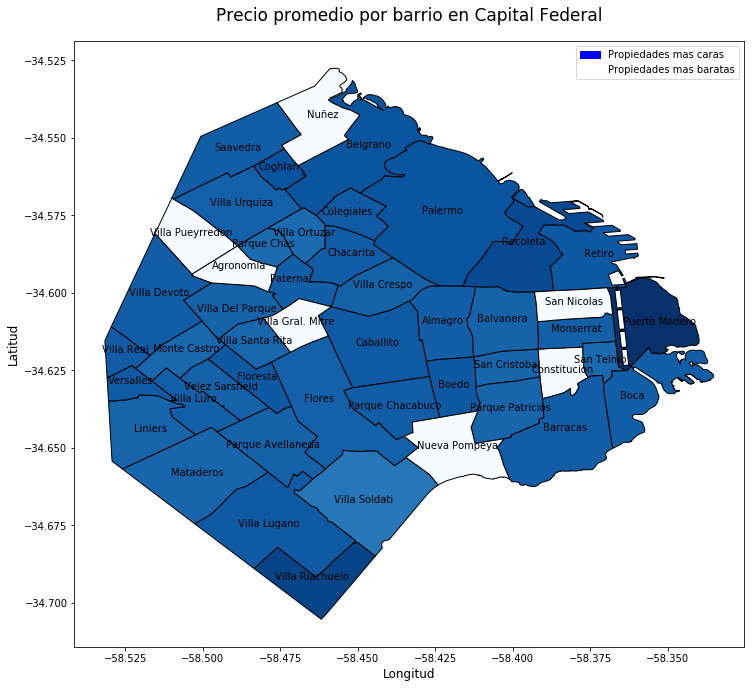

In [46]:
caba.BARRIO = caba.BARRIO.str.title()
plot = caba.plot(figsize = (12,12), column = 'price_aprox_usd', cmap='Blues',edgecolor = 'black');
caba['coords'] = caba['geometry'].apply(lambda x: x.representative_point().coords[:])
caba['coords'] = [coords[0] for coords in caba['coords']]
for idx, row in caba.iterrows():
    plt.annotate(s=row['BARRIO'], xy=row['coords'],horizontalalignment='center',)
plot.set_title('Precio promedio por barrio en Capital Federal');
plot.set_xlabel("Longitud");
plot.set_ylabel("Latitud");

#Ver si se puede poner solo algo tipo tablita
caro_label = mpatches.Patch(color='Blue', label='Propiedades mas caras')
barato_label = mpatches.Patch(color='white', label='Propiedades mas baratas')
plt.legend(handles=[caro_label, barato_label])

plt.savefig('informe/imagenes/mapa_promedio_precios_Capital.png', bbox_inches = 'tight', pad_inches = 0.5)

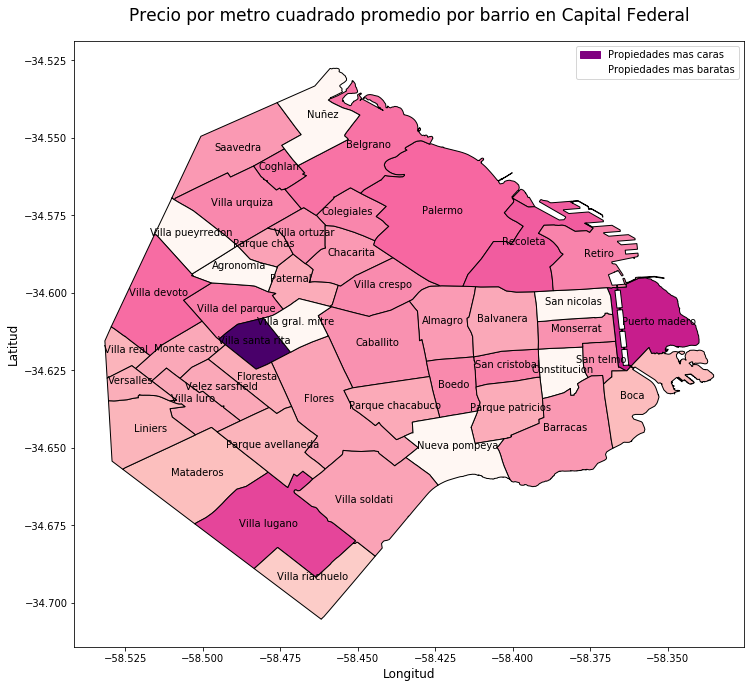

In [47]:
caba.BARRIO = caba.BARRIO.str.capitalize()
plot = caba.plot(figsize = (12,12), column = 'price_usd_per_m2', cmap='RdPu',edgecolor = 'black')
caba['coords'] = caba['geometry'].apply(lambda x: x.representative_point().coords[:])
caba['coords'] = [coords[0] for coords in caba['coords']]
for idx, row in caba.iterrows():
    plt.annotate(s=row['BARRIO'], xy=row['coords'],horizontalalignment='center',)
plot.set_title('Precio por metro cuadrado promedio por barrio en Capital Federal');
plot.set_xlabel("Longitud");
plot.set_ylabel("Latitud");

#Ver si se puede poner solo algo tipo tablita
caro_label = mpatches.Patch(color='Purple', label='Propiedades mas caras')
barato_label = mpatches.Patch(color='white', label='Propiedades mas baratas')
plt.legend(handles=[caro_label, barato_label])

plt.savefig('informe/imagenes/mapa_promedio_precios_m2_Capital.png', bbox_inches = 'tight', pad_inches = 0.5)

In [48]:
caba.head(2)

,BARRIO,COMUNA,PERIMETRO,AREA,geometry,price_aprox_usd,price_usd_per_m2,coords
0,Chacarita,15.0,7725.695228,3.118101e+06,"POLYGON ((-58.4528200492791 -34.5959886570639,...",140500.768217,2172.900778,"(-58.4518481023, -34.5878547497)"
1,Paternal,15.0,7087.513295,2.229829e+06,"POLYGON ((-58.4655768128541 -34.5965577078058,...",138492.949777,1878.938217,"(-58.4715658554, -34.596383068)"
